# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
printLog = []
lat = []
long = []
clean_cities = []
temp = []
humidity = []
clouds = []
wind = []
for city in cities:
    try:
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}").json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        clean_cities.append(response["name"])
        temp.append(response["main"]["temp_max"] - 273.15)
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        printLog.append(print("City Name:", response["name"],",", "City ID:", response["id"]))
    except KeyError:
        print("City Name:", city, "not found")

City Name: Kismayo , City ID: 55671
City Name: Gīdolē , City ID: 336526
City Name: Busselton , City ID: 2075265
City Name: Havøysund , City ID: 779622
City Name: Zeerust , City ID: 937136
City Name: Tasiilaq , City ID: 3424607
City Name: Dingle , City ID: 1714733
City Name: Punta Arenas , City ID: 3874787
City Name: Ushuaia , City ID: 3833367
City Name: Tingi , City ID: 877384
City Name: Barrow , City ID: 5880054
City Name: Hajdúhadház , City ID: 720287
City Name: Tikrit , City ID: 90150
City Name: Airai , City ID: 1651810
City Name: Srednekolymsk , City ID: 2121025
City Name: Hobart , City ID: 2163355
City Name: Rikitea , City ID: 4030556
City Name: Port Elizabeth , City ID: 964420
City Name: Saint-Philippe , City ID: 935215
City Name: Jamestown , City ID: 5122534
City Name: Batagay , City ID: 2027044
City Name: Paysandu , City ID: 3441243
City Name: Tabas , City ID: 113659
City Name: Los Llanos de Aridane , City ID: 2514651
City Name: Sola , City ID: 2134814
City Name: illoqqortoormi

City Name: Souillac , City ID: 933995
City Name: Ancud , City ID: 3899695
City Name: Acapulco de Juárez , City ID: 3533462
City Name: Araouane , City ID: 2460954
City Name: Dalvik , City ID: 2632287
City Name: Avera , City ID: 4231997
City Name: Delta del Tigre , City ID: 3442778
City Name: Islamkot , City ID: 1176608
City Name: Sitka , City ID: 5557293
City Name: Hudson Bay , City ID: 5978133
City Name: obluche not found
City Name: ondorhaan not found
City Name: Dudinka , City ID: 1507116
City Name: Gambēla , City ID: 337405
City Name: Klaksvík , City ID: 2618795
City Name: Tortosa , City ID: 3107677
City Name: Chokurdakh , City ID: 2126123
City Name: Narsaq , City ID: 3421719
City Name: Asău , City ID: 686090
City Name: sentyabrskiy not found
City Name: Victor Harbor , City ID: 2059470
City Name: suao not found
City Name: amderma not found
City Name: Honningsvåg , City ID: 779554
City Name: Esperance , City ID: 2071860
City Name: Pisco , City ID: 3932145
City Name: Tomatlán , City ID

City Name: Matara , City ID: 1235846
City Name: hihifo not found
City Name: Morón , City ID: 3430545
City Name: Rāmānuj Ganj , City ID: 1258731
City Name: Bintulu , City ID: 1737486
City Name: mudyuga not found
City Name: Baghdad , City ID: 98182
City Name: Along , City ID: 1278969
City Name: umm durman not found
City Name: zachagansk not found
City Name: Campos dos Goytacazes , City ID: 3467693
City Name: Beloha , City ID: 1067565
City Name: Parabel' , City ID: 1495586
City Name: Chumikan , City ID: 2025256
City Name: Kokopo , City ID: 2093685
City Name: umzimvubu not found
City Name: Fairbanks , City ID: 5861897
City Name: Kaputa , City ID: 176758
City Name: Constitución , City ID: 3893726
City Name: Vila , City ID: 7117100
City Name: Fortuna , City ID: 5563839
City Name: Kropotkin , City ID: 540761
City Name: morrelganj not found
City Name: Kidal , City ID: 2455290
City Name: Sirte , City ID: 2210554
City Name: Jipijapa , City ID: 3655446
City Name: Meulaboh , City ID: 1214488
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
#Create Data Frame
cityData_df = pd.DataFrame({"City":clean_cities,"Latitude": lat, "Longitude": long, "Humidity": humidity, "Temperature": temp, "Clouds": clouds, "Wind": wind})
#Create Output File (CSV)
output_data_file = "output_data/city_data.csv"
cityData_df.to_csv(output_data_file, index=False)
#Display the DataFrame
cityData_df.head()

,City,Latitude,Longitude,Humidity,Temperature,Clouds,Wind
0,Kismayo,-0.3582,42.5454,82,25.79,9,6.02
1,Gīdolē,5.6500,37.3667,69,15.66,48,0.81
2,Busselton,-33.6500,115.3333,54,23.38,40,3.81
3,Havøysund,70.9963,24.6622,60,1.49,100,14.72
4,Zeerust,-25.5369,26.0751,78,19.45,99,5.06


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
cityData_df.describe()


,Latitude,Longitude,Humidity,Temperature,Clouds,Wind
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,19.986400,21.498231,73.018315,9.654817,55.412088,3.927912
std,33.788291,91.200451,20.001184,18.595499,40.431623,3.001231
min,-54.800000,-179.166700,9.000000,-43.340000,0.000000,0.000000
25%,-8.087225,-59.406850,63.000000,-1.685000,10.000000,1.790000
50%,23.409350,27.671100,76.000000,16.290000,64.000000,3.210000
75%,48.599975,104.171875,88.000000,24.635000,100.000000,5.237500
max,78.218600,179.316700,100.000000,39.340000,100.000000,21.190000


In [6]:
#  Get the indices of cities that have humidity over 100%.
underOneHundred = cityData_df.loc[(cityData_df["Humidity"] < 100)]
overOneHundred = cityData_df[(cityData_df["Humidity"] > 100)].index
print(overOneHundred)

Int64Index([], dtype='int64')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

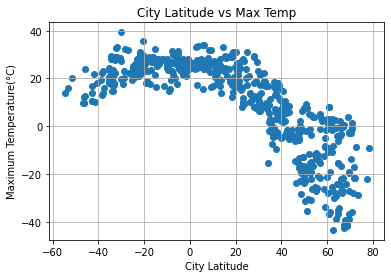

In [56]:
Lat = cityData_df["Latitude"]
Temp = cityData_df["Temperature"]
Humid = cityData_df["Humidity"]
Cloud = cityData_df["Clouds"]
Wind = cityData_df["Wind"]

LatVsTemp_plot = plt.scatter(Lat, Temp)
plt.title("City Latitude vs Max Temp")
plt.xlabel("City Latitude")
plt.ylabel("Maximum Temperature(°C)")
plt.grid()
plt.savefig("images/lat-temp-plot.png")
plt.show()


## Latitude vs. Humidity Plot

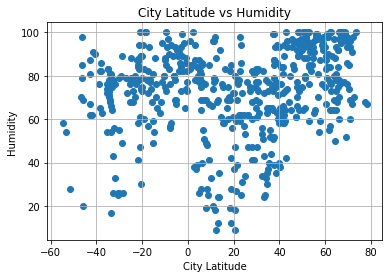

In [41]:
LatVsHumid_plot = plt.scatter(Lat, Humid)
plt.title("City Latitude vs Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("images/lat-humidity-plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

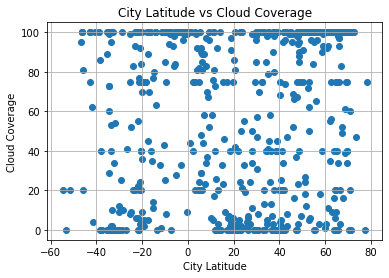

In [42]:
LatVsClouds_plot = plt.scatter(Lat, Cloud)
plt.title("City Latitude vs Cloud Coverage")
plt.xlabel("City Latitude")
plt.ylabel("Cloud Coverage")
plt.grid()
plt.savefig("images/lat-cloudiness-plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

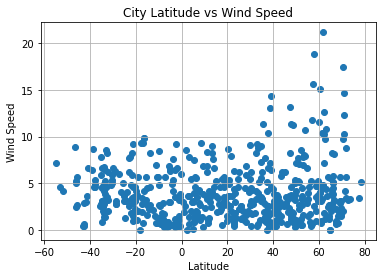

In [43]:
LatVsWind_plot = plt.scatter(Lat, Wind)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("images/lat-wind-plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

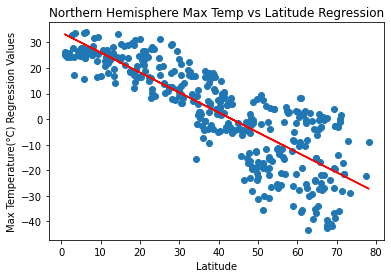

In [57]:
NorthernHemp_df = cityData_df.loc[(cityData_df["Latitude"] > 0)]
NorthernHemp_df

northLat = NorthernHemp_df["Latitude"]
northTemp = NorthernHemp_df["Temperature"]
n_temp_regress_values = linregress(northLat, northTemp)
n_temp_values = northLat * n_temp_regress_values[0] + n_temp_regress_values[1]
NorthernTemp_plot = plt.scatter(northLat, northTemp)
plt.plot(northLat, n_temp_values, color = "r")
plt.title("Northern Hemisphere Max Temp vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(°C) Regression Values")
plt.savefig("images/northern-temperature-regress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

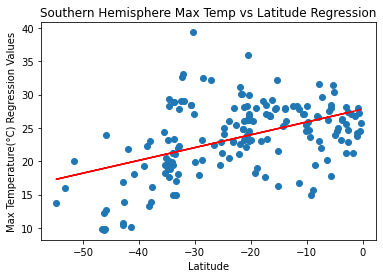

In [58]:
SouthernHemp_df = cityData_df.loc[(cityData_df["Latitude"] < 0)]
SouthernHemp_df

southLat = SouthernHemp_df["Latitude"]
southTemp = SouthernHemp_df["Temperature"]
s_temp_regress_values = linregress(southLat, southTemp)
s_temp_values = southLat * s_temp_regress_values[0] + s_temp_regress_values[1]
SouthernTemp_plot = plt.scatter(southLat, southTemp)
plt.plot(southLat, s_temp_values, color = "r")
plt.title("Southern Hemisphere Max Temp vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(°C) Regression Values")
plt.savefig("images/southern-temperature-regress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

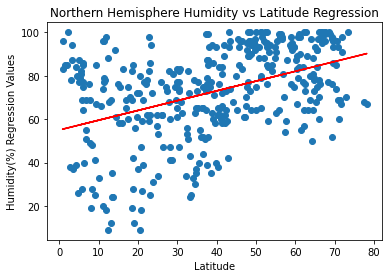

In [46]:
northHum = NorthernHemp_df["Humidity"]
n_hum_regress_values = linregress(northLat, northHum)
n_hum_values = northLat * n_hum_regress_values[0] + n_hum_regress_values[1]
NorthernHum_plot = plt.scatter(northLat, northHum)
plt.plot(northLat, n_hum_values, color = "r")
plt.title("Northern Hemisphere Humidity vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%) Regression Values")
plt.savefig("images/northern-humidity-regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

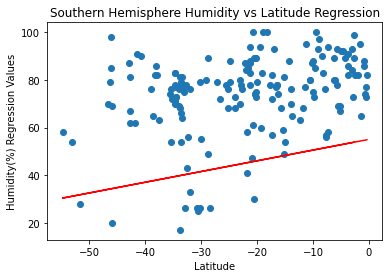

In [47]:
southHum = SouthernHemp_df["Humidity"]
s_hum_regress_values = linregress(northLat, northHum)
s_hum_values = southLat * s_hum_regress_values[0] + s_hum_regress_values[1]
SouthernHum_plot = plt.scatter(southLat, southHum)
plt.plot(southLat, s_hum_values, color = "r")
plt.title("Southern Hemisphere Humidity vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%) Regression Values")
plt.savefig("images/southern-humidity-regress.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

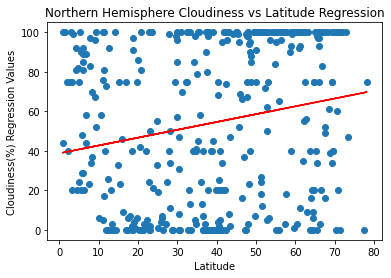

In [48]:
northClo = NorthernHemp_df["Clouds"]
n_clo_regress_values = linregress(northLat, northClo)
n_clo_values = northLat * n_clo_regress_values[0] + n_clo_regress_values[1]
NorthernClo_plot = plt.scatter(northLat, northClo)
plt.plot(northLat, n_clo_values, color = "r")
plt.title("Northern Hemisphere Cloudiness vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%) Regression Values")
plt.savefig("images/northern-cloudiness-regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

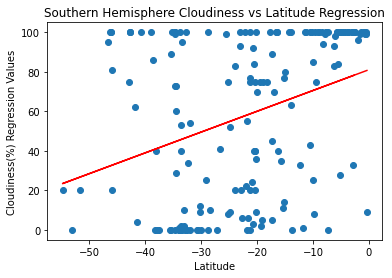

In [49]:
southClo = SouthernHemp_df["Clouds"]
s_clo_regress_values = linregress(southLat, southClo)
s_clo_values = southLat * s_clo_regress_values[0] + s_clo_regress_values[1]
SouthernClo_plot = plt.scatter(southLat, southClo)
plt.plot(southLat, s_clo_values, color = "r")
plt.title("Southern Hemisphere Cloudiness vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%) Regression Values")
plt.savefig("images/southern-cloudiness-regress.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

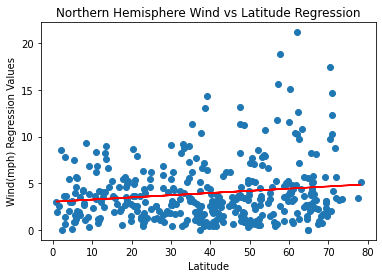

In [50]:
northWin = NorthernHemp_df["Wind"]
n_win_regress_values = linregress(northLat, northWin)
n_win_values = northLat * n_win_regress_values[0] + n_win_regress_values[1]
NorthernWin_plot = plt.scatter(northLat, northWin)
plt.plot(northLat, n_win_values, color = "r")
plt.title("Northern Hemisphere Wind vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind(mph) Regression Values")
plt.savefig("images/northern-windspeed-regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

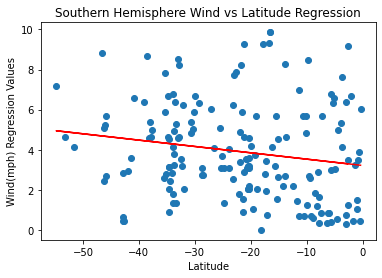

In [51]:
southWin = SouthernHemp_df["Wind"]
s_win_regress_values = linregress(southLat, southWin)
s_win_values = southLat * s_win_regress_values[0] + s_win_regress_values[1]
SouthernWin_plot = plt.scatter(southLat, southWin)
plt.plot(southLat, s_win_values, color = "r")
plt.title("Southern Hemisphere Wind vs Latitude Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind(mph) Regression Values")
plt.savefig("images/southern-windspeed-regress.png")
plt.show()